# Template notebook

It's good to start with an introduction, to set the scene and introduce your audience to the data, and the problem you're solving as a team.

<br>

## Libraries
As always, we'll start by importing the necessary libraries.

In [77]:
# It's good practice to add comments to explain your code 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in the data

In [78]:
data = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv", na_values='None', dtype = {'age_60_and_above':str})

In [79]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
1,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
2,2020-04-30,0.0,1.0,0.0,0.0,0.0,negative,NaN,male,Other
3,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
4,2020-04-30,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other


## EDA

In [80]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
               cough          fever    sore_throat  shortness_of_breath  \
count  278596.000000  278596.000000  278847.000000        278847.000000   
mean        0.151574       0.078077       0.006907             0.005655   
std         0.358608       0.268294       0.082821             0.074990   
min         0.000000       0.000000       0.000000             0.000000   
25%         0.000000       0.000000       0.000000             0.000000   
50%         0.000000       0.000000       0.000000             0.000000   
75%         0.000000       0.000000       0.000000             0.000000   
max         1.000000       1.000000       1.000000             1.000000   

           head_ache  
count  278847.000000  
mean        0.008657  
std         0.092640  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


In [81]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
test_date                   0
cough                     252
fever                     252
sore_throat                 1
shortness_of_breath         1
head_ache                   1
corona_result               0
age_60_and_above       127320
gender                  19563
test_indication             0
dtype: int64


In [82]:
# Data types of each column
print("\nData types of each column:")
print(data.dtypes)



Data types of each column:
test_date               object
cough                  float64
fever                  float64
sore_throat            float64
shortness_of_breath    float64
head_ache              float64
corona_result           object
age_60_and_above        object
gender                  object
test_indication         object
dtype: object


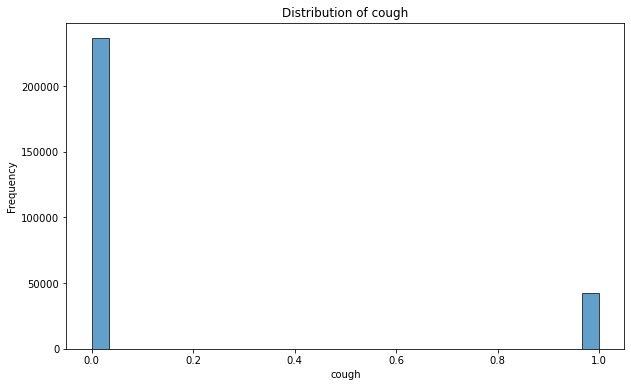

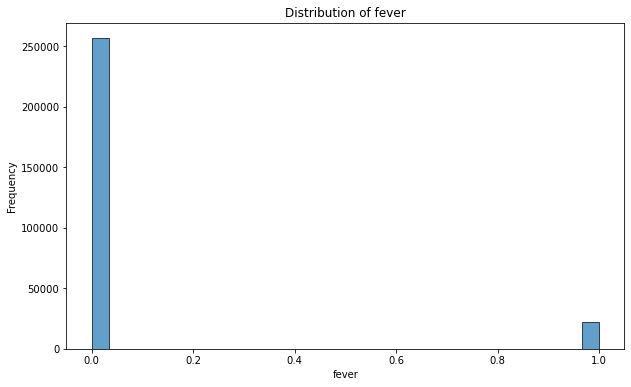

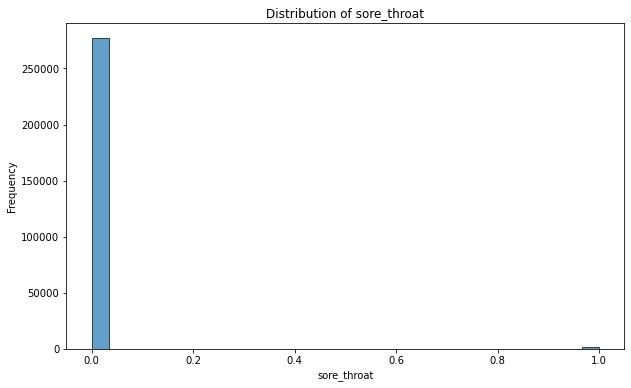

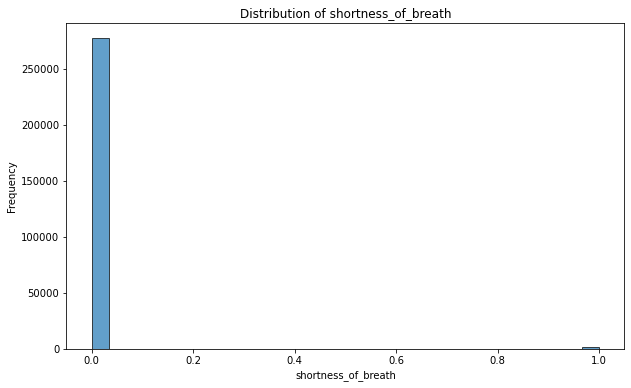

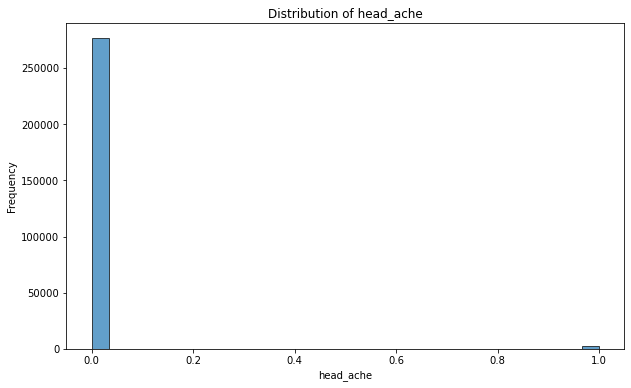

In [83]:
# Plot spread of numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
# Numerical columns are really numeric categorical columns (0/1 values)

In [84]:
categorical_columns = ['corona_result', 'age_60_and_above', 'gender', 'test_indication']

for column in categorical_columns:
    print(f"\nValue counts for {column}:")
    print(data[column].value_counts())


Value counts for corona_result:
negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64

Value counts for age_60_and_above:
No     125703
Yes     25825
Name: age_60_and_above, dtype: int64

Value counts for gender:
female    130158
male      129127
Name: gender, dtype: int64

Value counts for test_indication:
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: test_indication, dtype: int64


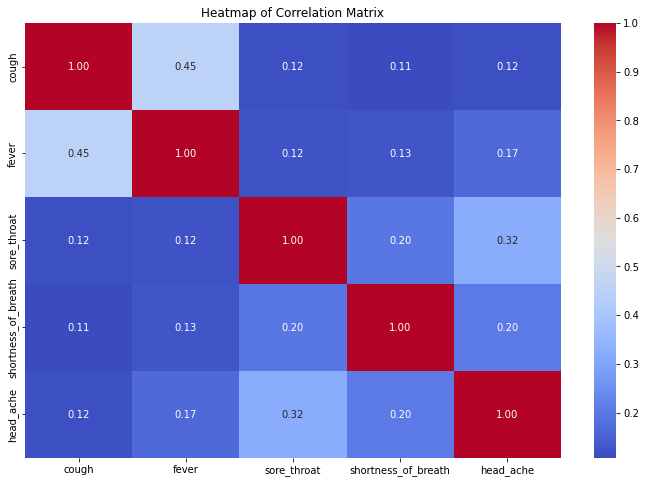

In [85]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()



In [86]:
#Group by 'corona_result' and calculate mean of numerical columns
grouped_df = data.groupby('corona_result')[numerical_columns].mean()
display(grouped_df)



,cough,fever,sore_throat,shortness_of_breath,head_ache
corona_result,,,,,
negative,0.134561,0.060829,0.001406,0.001479,0.000569
other,0.168808,0.096865,0.008736,0.007194,0.007965
positive,0.448013,0.378266,0.103612,0.079033,0.151752


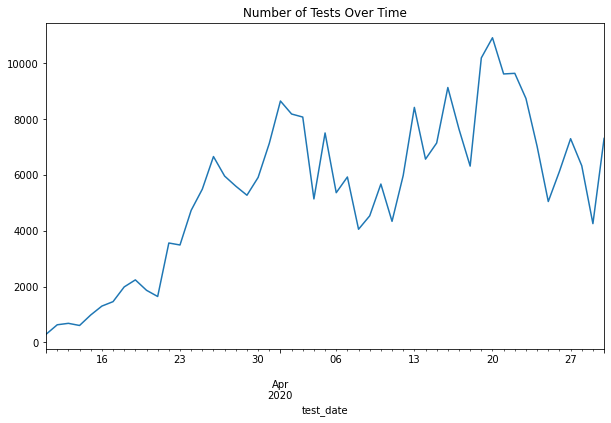

In [87]:
data['test_date'] = pd.to_datetime(data['test_date'])
data.set_index('test_date', inplace=True)

#Plotting the number of tests over time
data['test_count'] = 1
data['test_count'].resample('D').sum().plot(figsize=(10, 6))
plt.title('Number of Tests Over Time')
plt.show()


## Pre-Processing 

In [88]:
df = data.copy()
df = df.dropna(subset=['sore_throat', 'shortness_of_breath', 'head_ache'])
df.isna().sum()

cough                     251
fever                     251
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       127319
gender                  19562
test_indication             0
test_count                  0
dtype: int64

In [89]:
# now one hot encode age 60 and gender
df['age_60_and_above'] = df['age_60_and_above'].fillna('missing')
df['gender'] = df['gender'].fillna('missing')
df['cough'] = df['cough'].fillna('missing')
df['fever'] = df['fever'].fillna('missing')

one_hot_encoded_data = pd.get_dummies(df, columns = ['age_60_and_above','gender','cough','fever'])
#display(one_hot_encoded_data.sample(10))
one_hot_encoded_data.isna().sum()

sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
test_indication             0
test_count                  0
age_60_and_above_No         0
age_60_and_above_Yes        0
age_60_and_above_missing    0
gender_female               0
gender_male                 0
gender_missing              0
cough_0.0                   0
cough_1.0                   0
cough_missing               0
fever_0.0                   0
fever_1.0                   0
fever_missing               0
dtype: int64

## Model

### Logistic Regression
For this basic model, we do not need date of the test taken.


In [90]:
#pip install imbalanced-learn

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
dataset = pd.read_csv("data/corona_tested_individuals_ver_006.english.csv", na_values='None', dtype = {'age_60_and_above':str})
dataset.isna().sum()

test_date                   0
cough                     252
fever                     252
sore_throat                 1
shortness_of_breath         1
head_ache                   1
corona_result               0
age_60_and_above       127320
gender                  19563
test_indication             0
dtype: int64

In [93]:
#dataset = dataset.drop(columns = ['test_date'])
dataset['test_date'] = pd.to_datetime(dataset['test_date'])
dataset2 = dataset.dropna(subset=['sore_throat', 'shortness_of_breath', 'head_ache'])
dataset2.isna().sum()

test_date                   0
cough                     251
fever                     251
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       127319
gender                  19562
test_indication             0
dtype: int64

In [94]:
#dataset2['test_year'] = dataset2['test_date'].dt.year # not important
dataset2['test_month'] = dataset2['test_date'].dt.month
dataset2['test_day'] = dataset2['test_date'].dt.day
dataset2['test_dayofweek'] = dataset2['test_date'].dt.dayofweek

C:\Users\EYAU\AppData\Local\Temp\ipykernel_10456\1821539108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['test_month'] = dataset2['test_date'].dt.month
C:\Users\EYAU\AppData\Local\Temp\ipykernel_10456\1821539108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2['test_day'] = dataset2['test_date'].dt.day
C:\Users\EYAU\AppData\Local\Temp\ipykernel_10456\1821539108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [95]:
symptom_columns = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']

# Create missingness indicators for symptoms - we want to make a symptom score
for col in symptom_columns:
    dataset2[col + '_missing'] = dataset2[col].isnull().astype(int)

# Fill missing values with 0 for the sum calculation
dataset2[symptom_columns] = dataset2[symptom_columns].fillna(0).astype(float)

# Create interaction feature: sum of symptoms
dataset2['symptom_sum'] = dataset2[symptom_columns].sum(axis=1)

dataset2['age_60_and_above'] = dataset2['age_60_and_above'].fillna('3')
dataset2['gender'] = dataset2['gender'].fillna('3')

C:\Users\EYAU\AppData\Local\Temp\ipykernel_10456\1455117159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2[col + '_missing'] = dataset2[col].isnull().astype(int)
C:\Users\EYAU\AppData\Local\Temp\ipykernel_10456\1455117159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2[col + '_missing'] = dataset2[col].isnull().astype(int)
C:\Users\EYAU\AppData\Local\Temp\ipykernel_10456\1455117159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [116]:
columns_encode = dataset2.drop(columns =['test_date','corona_result']).columns.tolist()
print(columns_encode)
dataset2 = dataset2.drop(columns = ['test_date'])
one_hot_encoded_data = pd.get_dummies(dataset2, columns = columns_encode)

['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication', 'test_month', 'test_day', 'test_dayofweek', 'cough_missing', 'fever_missing', 'sore_throat_missing', 'shortness_of_breath_missing', 'head_ache_missing', 'symptom_sum']


In [117]:
one_hot_encoded_data

,corona_result,cough_0.0,cough_1.0,fever_0.0,fever_1.0,sore_throat_0.0,sore_throat_1.0,shortness_of_breath_0.0,shortness_of_breath_1.0,head_ache_0.0,...,fever_missing_1,sore_throat_missing_0,shortness_of_breath_missing_0,head_ache_missing_0,symptom_sum_0.0,symptom_sum_1.0,symptom_sum_2.0,symptom_sum_3.0,symptom_sum_4.0,symptom_sum_5.0
0,negative,1,0,1,0,1,0,1,0,1,...,0,1,1,1,1,0,0,0,0,0
1,negative,0,1,1,0,1,0,1,0,1,...,0,1,1,1,0,1,0,0,0,0
2,negative,1,0,0,1,1,0,1,0,1,...,0,1,1,1,0,1,0,0,0,0
3,negative,0,1,1,0,1,0,1,0,1,...,0,1,1,1,0,1,0,0,0,0
4,negative,0,1,1,0,1,0,1,0,1,...,0,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,negative,1,0,1,0,1,0,1,0,1,...,0,1,1,1,1,0,0,0,0,0
278844,negative,1,0,1,0,1,0,1,0,1,...,0,1,1,1,1,0,0,0,0,0
278845,positive,1,0,1,0,1,0,1,0,1,...,0,1,1,1,1,0,0,0,0,0
278846,other,1,0,1,0,1,0,1,0,1,...,0,1,1,1,1,0,0,0,0,0


In [118]:
encoded_data2 = one_hot_encoded_data[one_hot_encoded_data['corona_result'] != 'other']

In [119]:
# split the data according to x and y
# features and target
x = encoded_data2.drop(columns = ['corona_result'])
y = encoded_data2['corona_result']

In [120]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274955 entries, 0 to 278847
Data columns (total 72 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   cough_0.0                               274955 non-null  uint8
 1   cough_1.0                               274955 non-null  uint8
 2   fever_0.0                               274955 non-null  uint8
 3   fever_1.0                               274955 non-null  uint8
 4   sore_throat_0.0                         274955 non-null  uint8
 5   sore_throat_1.0                         274955 non-null  uint8
 6   shortness_of_breath_0.0                 274955 non-null  uint8
 7   shortness_of_breath_1.0                 274955 non-null  uint8
 8   head_ache_0.0                           274955 non-null  uint8
 9   head_ache_1.0                           274955 non-null  uint8
 10  age_60_and_above_3                      274955 non-null  uint8
 11  

In [121]:
ros = RandomOverSampler(sampling_strategy = 1)
rus = RandomUnderSampler(sampling_strategy = 'minority', random_state=42)

In [122]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [123]:
X_train_Osample, y_train_Osample = ros.fit_resample(x_train, y_train)

In [124]:
model = LogisticRegression()
model.fit(X_train_Osample, y_train_Osample)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

C:\Users\EYAU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9168591224018475
Confusion Matrix:
[[48129  3896]
 [  676  2290]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.99      0.93      0.95     52025
    positive       0.37      0.77      0.50      2966

    accuracy                           0.92     54991
   macro avg       0.68      0.85      0.73     54991
weighted avg       0.95      0.92      0.93     54991



In [125]:
from sklearn.metrics import roc_auc_score, roc_curve
y_prob = model.predict_proba(x_test)[:, 1]

auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC Score: {auc_score}')

AUC Score: 0.8977827228532368


In [126]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                                   Feature  Importance
17  test_indication_Contact with confirmed    3.114547
9                            head_ache_1.0    2.072651
69                         symptom_sum_3.0    1.669425
5                          sore_throat_1.0    1.363348
7                  shortness_of_breath_1.0    1.220070
..                                     ...         ...
4                          sore_throat_0.0   -0.712695
16                  test_indication_Abroad   -1.085332
18                   test_indication_Other   -1.378562
8                            head_ache_0.0   -1.421998
66                         symptom_sum_0.0   -1.701616

[72 rows x 2 columns]


**Question / Task 1**

Insert context about question / task 1 here.

In [ ]:
# Add your code here
